# **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Load Dataset**

In [2]:
heart = pd.read_csv(r"https://raw.githubusercontent.com/amankharwal/Website-data/master/heart.csv")

In [3]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# **Checking Null Values**

In [4]:
heart.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

As we can see there are no null values present and all the fatures are numerical. Therefore, dataset is already cleaned.

# **Data Analysis**

**Checking Counts**

<Axes: >

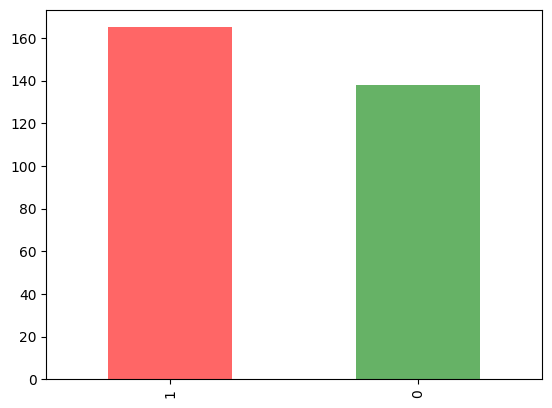

In [17]:
heart["target"].value_counts().plot(kind="bar",color=['r','g'],alpha=0.6)

We have more number of people which show signs of heart disease.

**Relations of features with target**

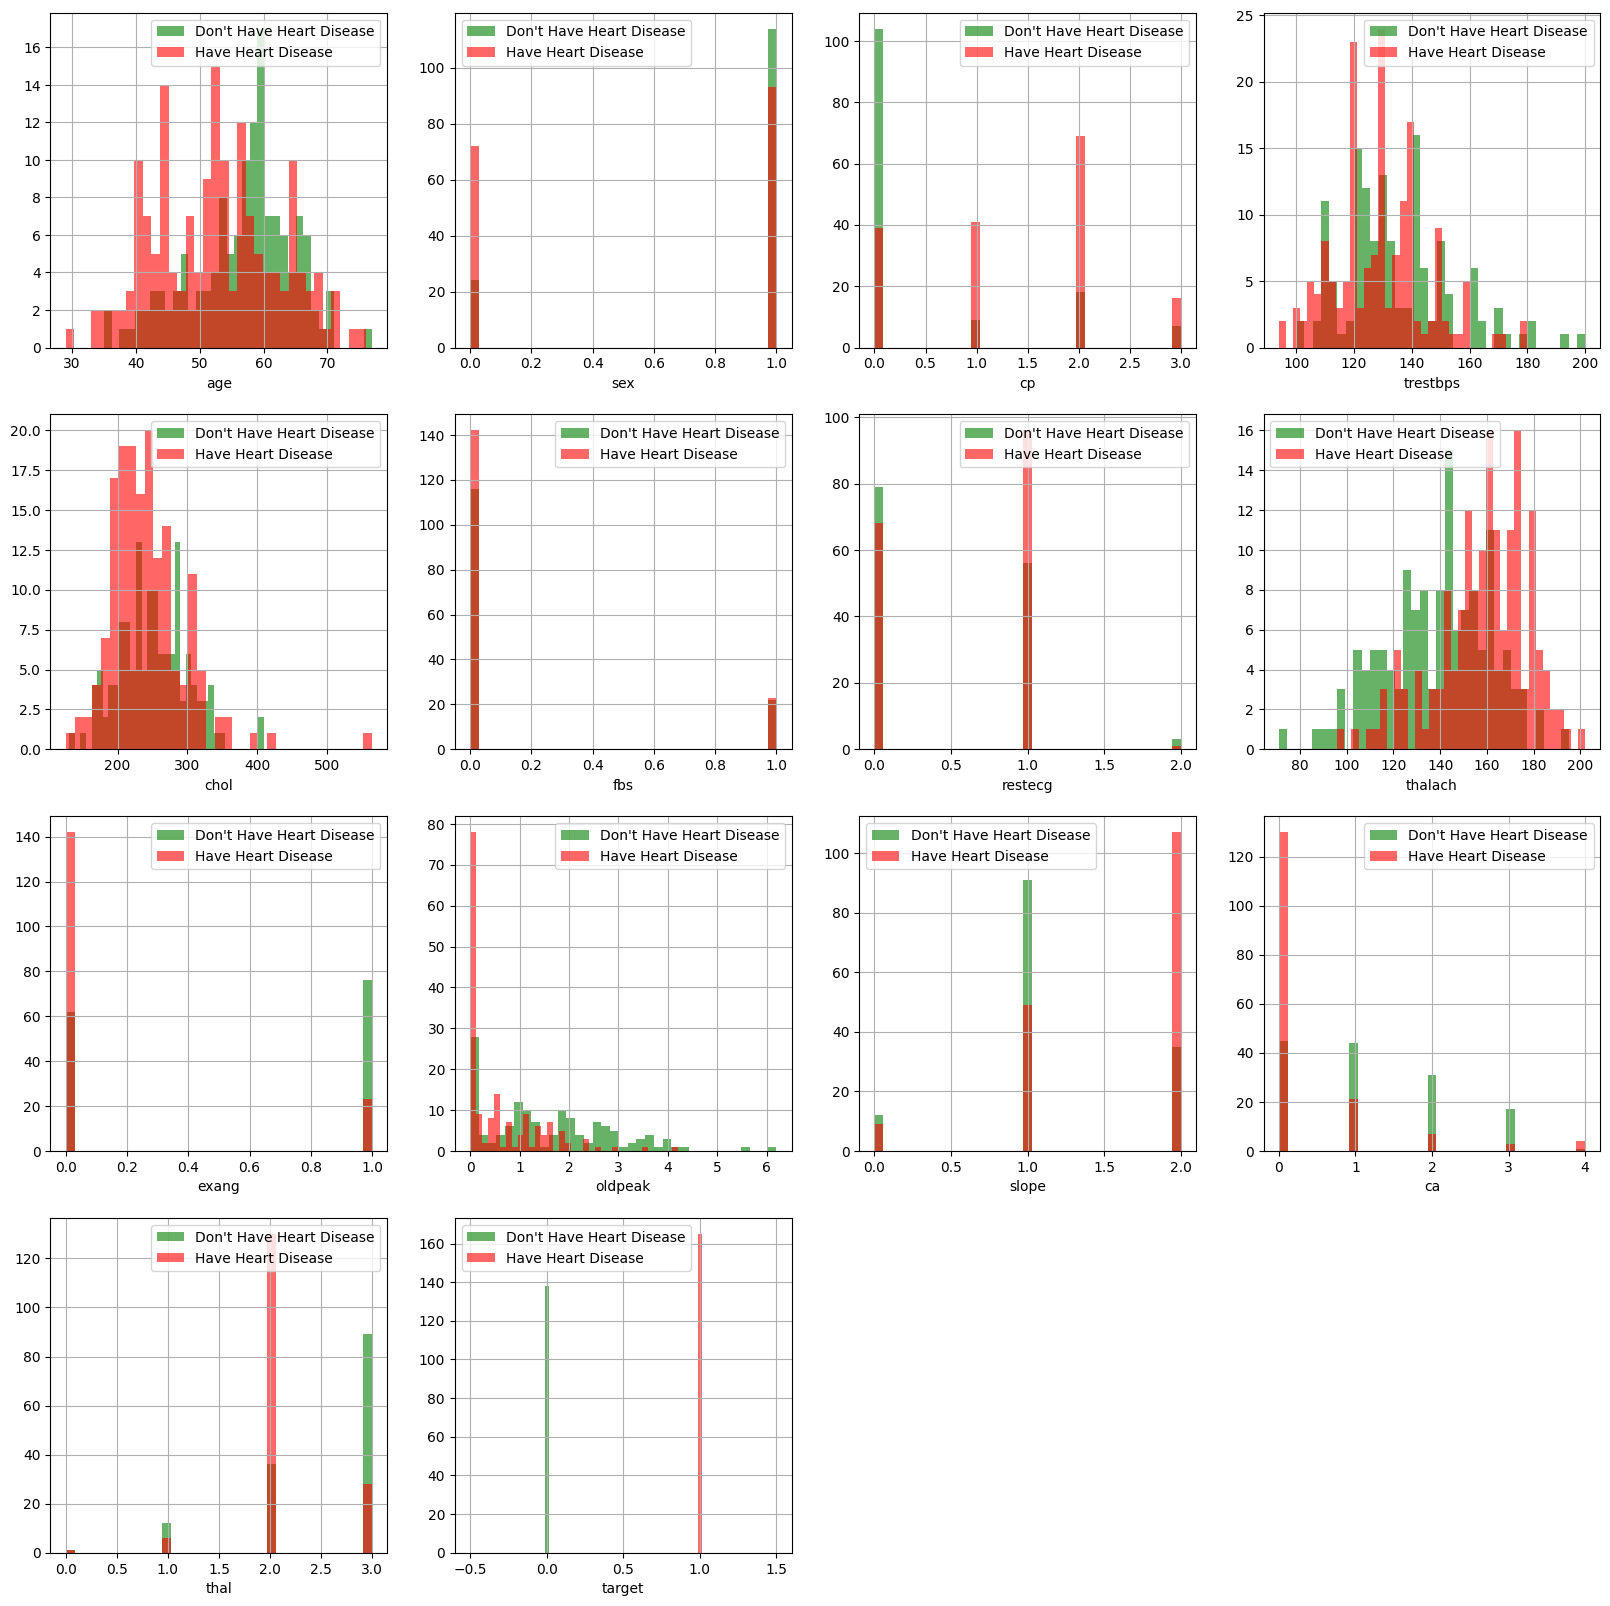

In [16]:
plt.figure(figsize=(20,20))
for i,column in enumerate(heart.columns,1):
  plt.subplot(4,4,i)
  heart[heart.target==0][column].hist(bins=35,color='g',alpha=0.6,label="Don't Have Heart Disease")
  heart[heart.target==1][column].hist(bins=35,color='r',alpha=0.6,label="Have Heart Disease")
  plt.legend()
  plt.xlabel(column)

**Age(age)** : People in their early 50's show more signs of heart disease while people in their late 50's show more chance of surving<br>
**Chest pain(cp)** : People with cp=2 show more prone to heart disease while people with cp=0 show less signs and more towards survivng.<br>
**Serum Cholestrol(chol)** : People with colestrol 140-180 are prone to heart disease.<br>
**Max Heart Rate Achieved(thalach)** : Lower the heart rate, lower the chance of survivng

# **Corellation**

<BarContainer object of 13 artists>

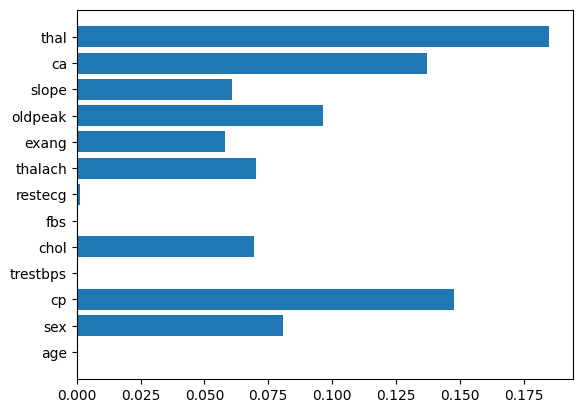

In [7]:
from sklearn.feature_selection import mutual_info_classif

importance = mutual_info_classif(heart.iloc[:,:-1],heart.iloc[:,-1])
plt.barh(heart.iloc[:,:-1].columns,importance)

<Axes: >

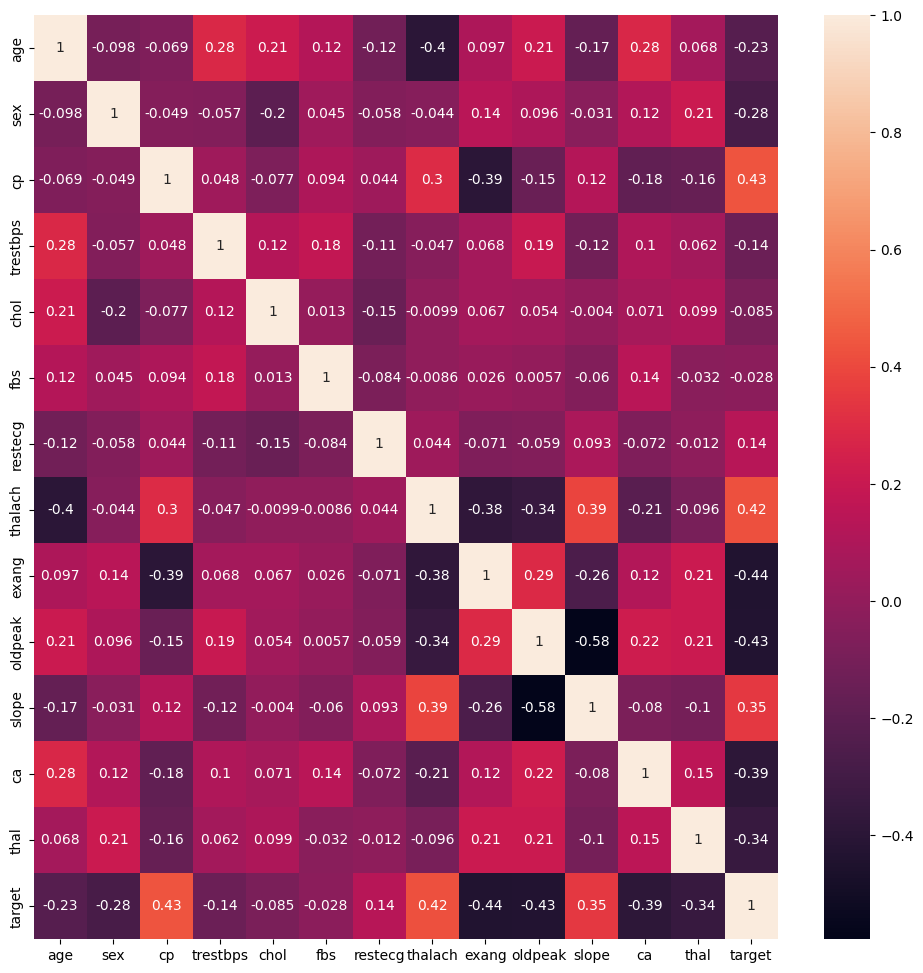

In [8]:
cor = heart.corr()
plt.figure(figsize=(12,12))
sns.heatmap(cor,annot=True)

<Axes: title={'center': 'Correlation with target'}>

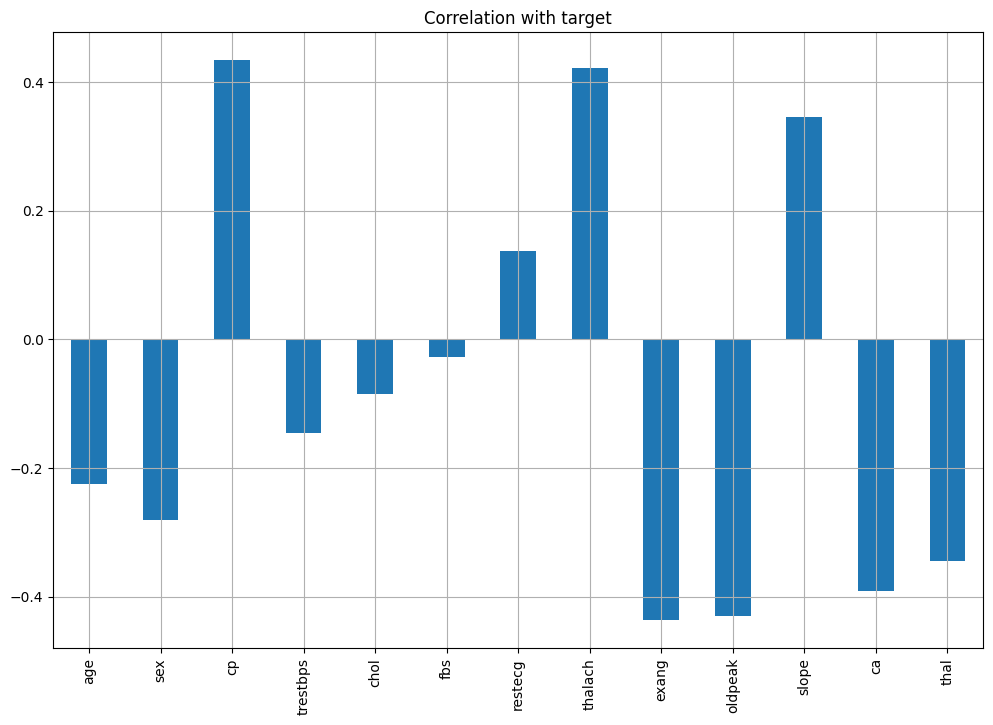

In [9]:
heart.drop('target', axis=1).corrwith(heart.target).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation with target")

From above, we conclude that *cp*, *restecg*, *thalach*, *slope* show more correlation to the target. Therefore, we would consider only these features to build our model.

# **Spliting the dataset**

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(heart[['cp','restecg','thalach','slope']],heart['target'],test_size=0.1,random_state=3)

# **Building our model**

According to sklearn documentation, *KNeighborsClassifier* is the best estimator for our dataset.<br>
**Link** : https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

**Finding the best value for the number of neighbors**

Optimal number of neighbors :  5
Test accuracy score         :  0.8709677419354839


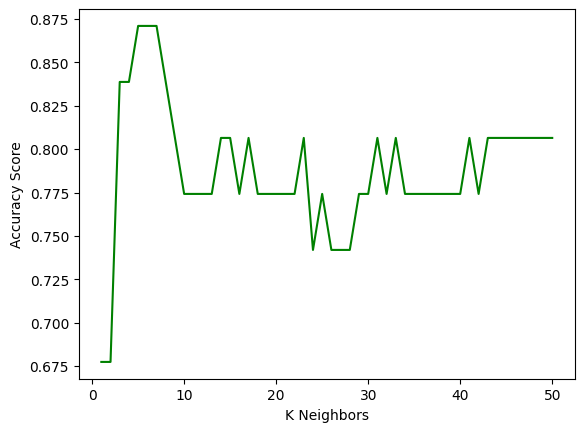

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

acc = []

for k in range(1,51):
  neigh = KNeighborsClassifier(n_neighbors=k)
  neigh.fit(X_train,Y_train)
  pred = neigh.predict(X_test)
  acc.append(accuracy_score(Y_test,pred))

plt.xlabel("K Neighbors")
plt.ylabel("Accuracy Score")
plt.plot(range(1,51),acc,'g')

print("Optimal number of neighbors : ",acc.index(max(acc))+1)
print("Test accuracy score         : ",max(acc))

**Training our model**

In [12]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train,Y_train)

train_pred = neigh.predict(X_train)
test_pred = neigh.predict(X_test)

**Testing our model**

<Axes: title={'center': 'Test'}>

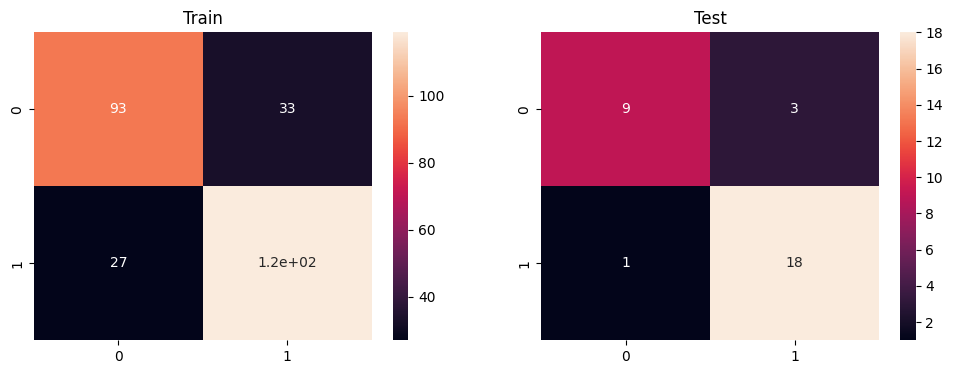

In [13]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(12,4))

plt.subplot(1,2,1).title.set_text("Train")
sns.heatmap(confusion_matrix(Y_train, train_pred),annot=True)

plt.subplot(1,2,2).title.set_text("Test")
sns.heatmap(confusion_matrix(Y_test, test_pred),annot=True)

In [14]:
from sklearn.metrics import classification_report
print("TRAIN CLASSIFICATION REPORT :")
print(classification_report(Y_train, train_pred))

print("\n\nTEST CLASSIFICATION REPORT :")
print(classification_report(Y_test, test_pred))

TRAIN CLASSIFICATION REPORT :
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       126
           1       0.78      0.82      0.80       146

    accuracy                           0.78       272
   macro avg       0.78      0.78      0.78       272
weighted avg       0.78      0.78      0.78       272



TEST CLASSIFICATION REPORT :
              precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.86      0.95      0.90        19

    accuracy                           0.87        31
   macro avg       0.88      0.85      0.86        31
weighted avg       0.87      0.87      0.87        31



**Conclusion** : As we can see, our model is performing great with an accuracy of 87% and the true values are far more greater than false values as seen in the correlation matrix.